In [1]:
!pip install -q kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']=os.getcwd()

In [5]:
!kaggle datasets download muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown




  0%|          | 0.00/309M [00:00<?, ?B/s]
 21%|##        | 64.0M/309M [00:00<00:00, 663MB/s]
 45%|####4     | 138M/309M [00:00<00:00, 727MB/s] 
 69%|######9   | 214M/309M [00:00<00:00, 752MB/s]
 93%|#########3| 288M/309M [00:00<00:00, 761MB/s]
100%|##########| 309M/309M [00:00<00:00, 747MB/s]


In [7]:
os.listdir()

['.ipynb_checkpoints',
 'Facial Emotion Detection.ipynb',
 'human-emotions-datasethes.zip',
 'kaggle.json',
 'README']

In [11]:
import zipfile
zip_file = "human-emotions-datasethes.zip"
extract_to = "dataset"
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
print("Extraction complete!")
print("Files extracted to:", os.path.abspath(extract_to))


Extraction complete!
Files extracted to: C:\Users\kmrig\OneDrive - IIT Kanpur\Desktop\Data-Science-and-Analytics\Facial Emotion Recognition\dataset


In [79]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import(GlobalAveragePooling2D,Resizing,Rescaling)
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import(Callback)
from tensorflow.keras.regularizers import L2,L1
from tensorflow.keras.layers import(GlobalAveragePooling2D)
from tensorflow.train import BytesList
from tensorflow.train import Example

In [1]:
train_directory=r"C:\Users\kmrig\OneDrive - IIT Kanpur\Desktop\Data-Science-and-Analytics\Facial Emotion Recognition\dataset\Emotions Dataset\Emotions Dataset\train"
validation_directory=r"C:\Users\kmrig\OneDrive - IIT Kanpur\Desktop\Data-Science-and-Analytics\Facial Emotion Recognition\dataset\Emotions Dataset\Emotions Dataset\test"  
CLASS_NAMES=["angry","sad","happy"]
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [67]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6799 files belonging to 3 classes.


In [50]:
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=None,
)

Found 2278 files belonging to 3 classes.


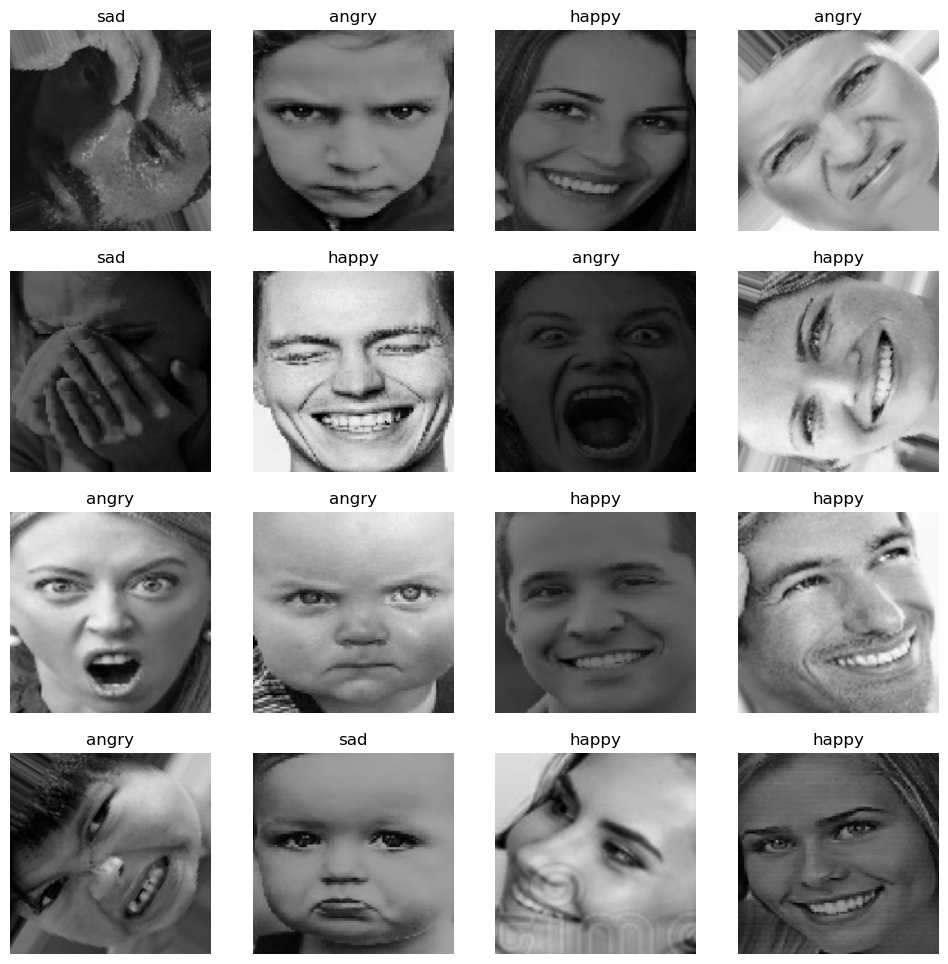

In [69]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255.)
        plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i],axis=0).numpy()])
        plt.axis("off")
        

In [71]:
training_dataset=(
  train_dataset.prefetch(tf.data.AUTOTUNE)  
)

In [73]:
validation_dataset=(
  train_dataset.prefetch(tf.data.AUTOTUNE)  
)

In [85]:
resize_rescale_layers=tf.keras.Sequential([
    Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    Rescaling(1./255),
    ])

In [ ]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),
    
    resize_rescale_layers,
    
    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),
    
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),
    
    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()